In [120]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
precise_oldest = np.genfromtxt('../../logs/precise_oldest/observer.txt', delimiter=' ')
precise_newest = np.genfromtxt('../../logs/precise_newest/observer.txt', delimiter=' ')
# scuttle_depth = np.genfromtxt('../../logs/scuttle_depth/observer.txt', delimiter=' ')
scuttle_breadth = np.genfromtxt('../../logs/scuttle_breadth/observer.txt', delimiter=' ')

In [122]:
ts = len(precise_oldest[0])

In [131]:
def plot_thr(traces, path, x_lim=(0, 20), y_lim=(0, 3.5), dim=(15, 6), title="Figure"):
    figure = plt.figure(figsize=dim, dpi=80)
    ax = figure.add_subplot(111)

    # Plot all traces with given parameters
    for (y, x, trace_name, marker, ls) in traces:
        ax.plot(x, y, label=trace_name, marker=marker, linestyle=ls)

    ax.legend(shadow=True, loc='upper right', frameon=False,
              fontsize='medium')
    # ax.set_title('Throughput', fontsize=20, y=1.02)
    ax.set_xlabel('Time (Seconds)', fontsize=12,
                  labelpad=10)
    ax.set_ylabel('max staleness (seconds)', fontsize=12,
                  labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=12)

    # ax.set_xlim(x_lim)
    # ax.set_ylim(y_lim)
    # ax.grid(True)

    # Save plot with multiple formats
    for ext in ['eps', 'pdf']:
        figure.savefig(path + "out_plot." + ext, bbox_inches='tight')
    plt.title(title)
    plt.show(figure)
    plt.close(figure)

In [132]:
# parameters of each trace:
#         1: y data
#         2: x data
#         3: legend name
#         4: trace marker (',', '>', 's', 'x', 'o', 'd', '<')
#         5: trace type ['solid', 'dashed', 'dashdot', 'dotted']
# traces = [
#     (max_stale, list(range(0, ts)), "precise-newest", "x", "solid"),
#     (max_stale, list(range(0, ts)), "scuttle-breadth", "x", "solid"),
#     ...
# ]

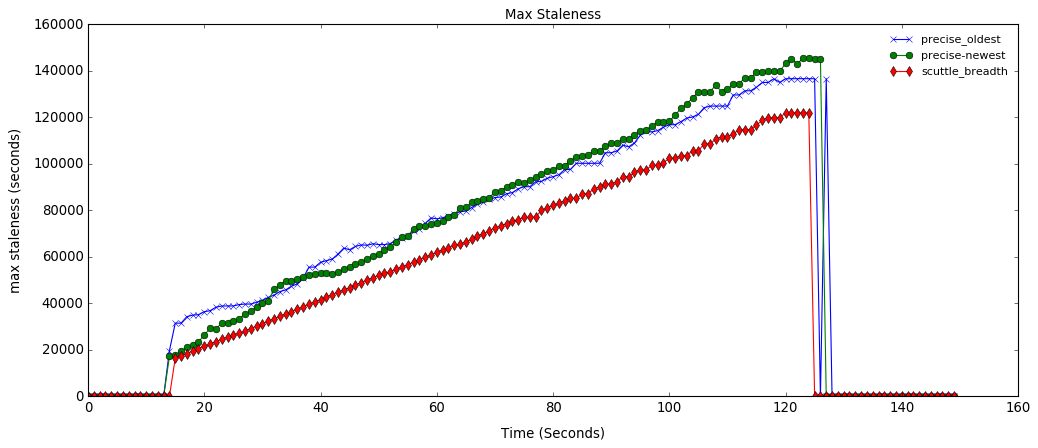

In [133]:
traces = [
    (precise_oldest[0], list(range(0, ts)), "precise_oldest", "x", "solid"),
    (precise_newest[0], list(range(0, ts)), "precise-newest", "o", "solid"),
#     (scuttle_depth[0], list(range(0, ts)), "scuttle_depth", "s", "solid"),
    (scuttle_breadth[0], list(range(0, ts)), "scuttle_breadth", "d", "solid")
]
plot_thr(traces, path="./", x_lim=(0, ts), title="Max Staleness")

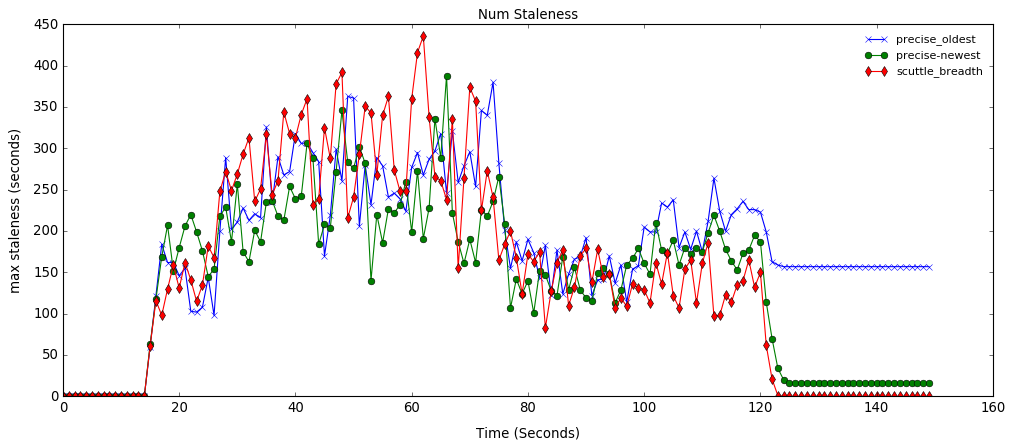

In [134]:
traces = [
    (precise_oldest[1], list(range(0, ts)), "precise_oldest", "x", "solid"),
    (precise_newest[1], list(range(0, ts)), "precise-newest", "o", "solid"),
#     (scuttle_depth[1], list(range(0, ts)), "scuttle_depth", "s", "solid"),
    (scuttle_breadth[1], list(range(0, ts)), "scuttle_breadth", "d", "solid")
]
plot_thr(traces, path="./", x_lim=(0, ts), title="Num Staleness")